In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


In [ ]:
file_path = "/content/drive/MyDrive/Msc data science project/creditcard.csv"
df = pd.read_csv(file_path)

#return rows and columns
df.shape


(284807, 31)

In [ ]:
#overview of Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
#checking for missing values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
#statistics of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
duplicates = df.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")



Number of duplicates: 1081


In [ ]:
df = df.drop_duplicates()
print(f"Number of duplicates: {df.duplicated().sum()}")


Number of duplicates: 0


In [ ]:
df.shape


(283726, 31)

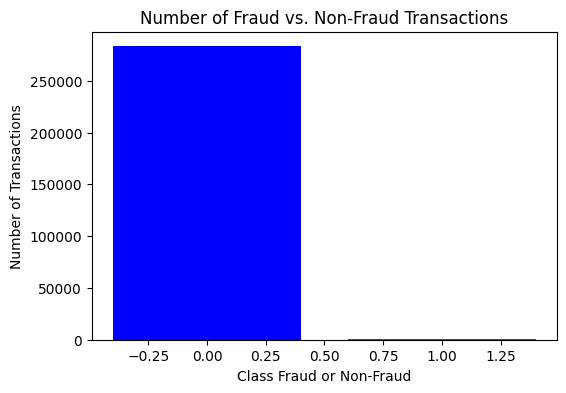

In [ ]:
class_counts = df['Class'].value_counts()
plt.figure(figsize=(6, 4))
#Used class_counts.index for x-axis (0 and 1)  class_counts.values for y-axis(transactions)
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xlabel("Class Fraud or Non-Fraud")
plt.ylabel("Number of Transactions")
plt.title("Number of Fraud vs. Non-Fraud Transactions")
plt.show()


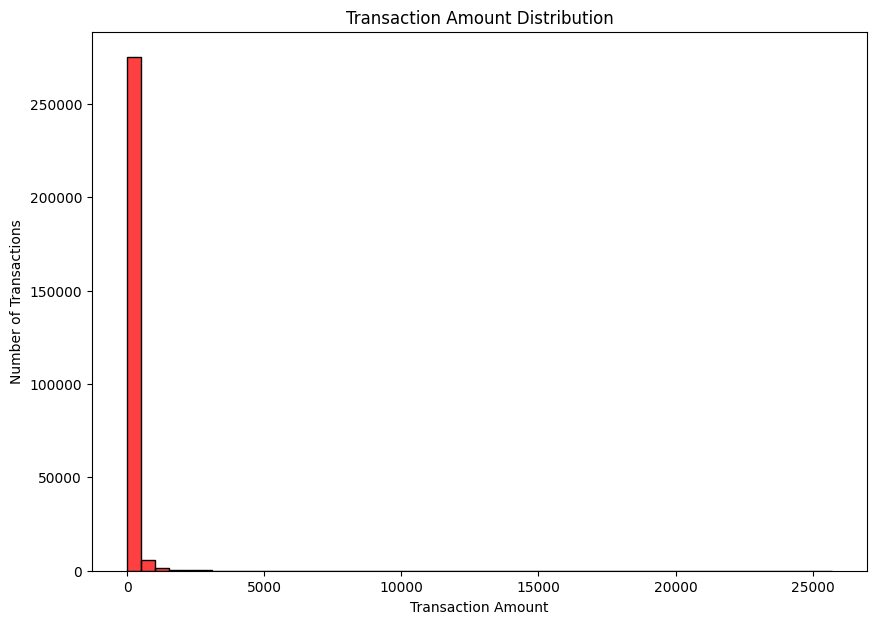

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Transaction Amount Distribution')
# Creating a histogram to show how transaction amounts are distributed
sns.histplot(df['Amount'], color='red', bins=50)
plt.xlabel("Transaction Amount")
plt.ylabel("Number of Transactions")
plt.show()


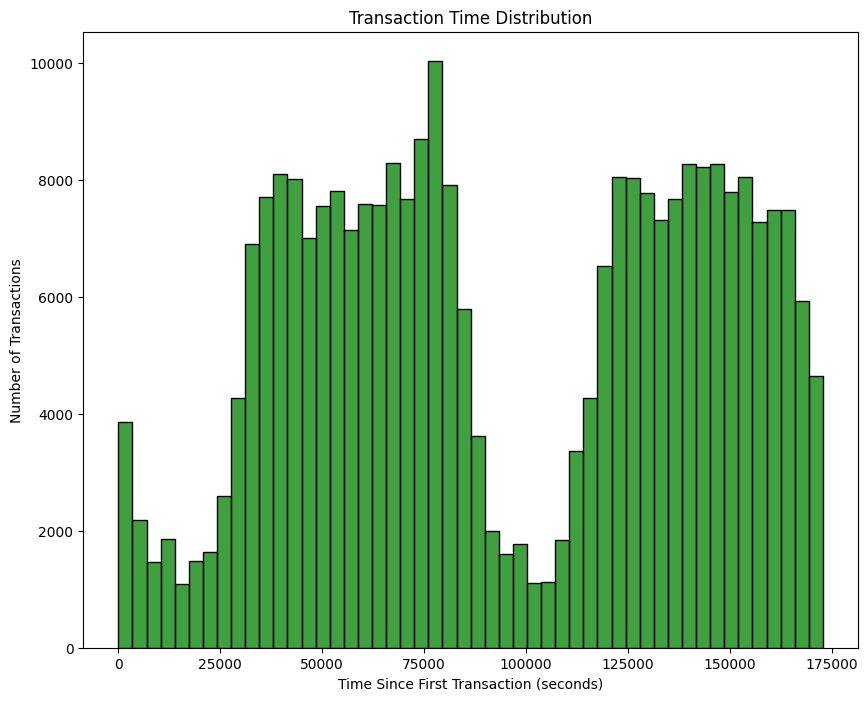

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Transaction Time Distribution')
# Creating a histogram to show when transactions happened
sns.histplot(df['Time'], color='green', bins=50)
plt.xlabel("Time Since First Transaction (seconds)")
plt.ylabel("Number of Transactions")
plt.show()


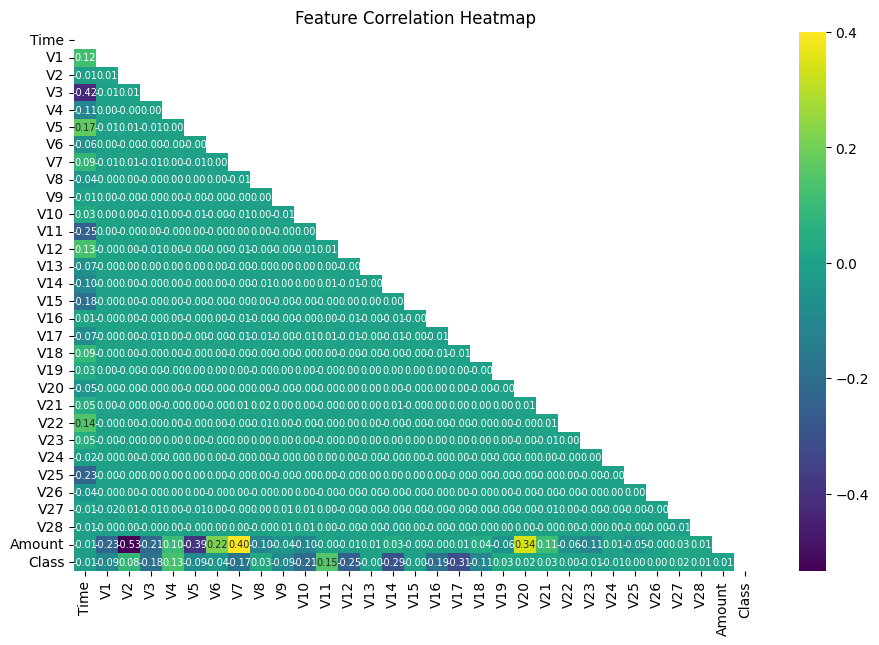

In [ ]:
# Get the correlation between features
correlation_matrix = df.corr()

# Make a mask to hide the top half of the correlation matrix
mask = np.triu(                              # Keep the top half (including diagonal) set the bottom half to False
         np.ones_like(correlation_matrix,    # Create a new matrix the same shape as the correlation matrix
                      dtype=bool))           # Fill it with True/False values - True means (hide this) in the heatmap


plt.figure(figsize=(11, 7))

# Create a heatmap to show feature correlations
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='viridis',
            fmt='.2f',
            mask=mask,            # Applied the mask to hide upper triangle values
            annot_kws={"size": 7}
           )

plt.title('Feature Correlation Heatmap')
plt.show()



In [ ]:
#finding the correlation between features
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


In [ ]:
fraud = df[df['Class'] == 1]
notfraud = df[df['Class'] == 0]

In [ ]:
fraud.shape

(473, 31)

In [ ]:
notfraud.shape

(283253, 31)

In [ ]:
notfraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,...,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.0
mean,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.001150,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575,0.0
std,47475.550607,1.922179,1.633520,1.457593,1.398575,1.355816,1.329914,1.177480,1.157140,1.086902,...,0.715629,0.723541,0.621165,0.605748,0.520612,0.482080,0.392700,0.327563,250.379023,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54233.000000,-0.913431,-0.601398,-0.883966,-0.851605,-0.687888,-0.767543,-0.550146,-0.208841,-0.641649,...,-0.228406,-0.542737,-0.161490,-0.354306,-0.317476,-0.326853,-0.070650,-0.052808,5.670000,0.0
50%,84711.000000,0.022562,0.062561,0.182247,-0.024500,-0.052807,-0.274172,0.041664,0.021633,-0.051368,...,-0.029798,0.006675,-0.011077,0.041115,0.016190,-0.052293,0.001368,0.011238,22.000000,0.0
75%,139308.000000,1.316788,0.797012,1.028261,0.734231,0.612442,0.397678,0.571029,0.324473,0.596969,...,0.185470,0.528136,0.147633,0.440051,0.350490,0.240023,0.090760,0.077961,77.460000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [ ]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,...,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.0
mean,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860,1.0
std,48636.179973,6.593145,4.122500,6.909647,2.871523,5.278831,1.715347,6.858024,5.585950,2.465047,...,2.731191,1.181295,1.508570,0.517900,0.806785,0.463016,1.245779,0.533100,260.211041,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41203.000000,-5.603690,1.145381,-7.926507,2.288644,-4.278983,-2.450444,-6.989195,-0.161518,-3.796760,...,0.027935,-0.521934,-0.341881,-0.436539,-0.320311,-0.263078,-0.015551,-0.097223,1.000000,1.0
50%,73408.000000,-2.271755,2.617105,-4.875397,4.100098,-1.372245,-1.420468,-2.902079,0.617738,-2.099049,...,0.573898,0.055179,-0.075034,-0.061263,0.077913,0.012792,0.394682,0.145895,9.820000,1.0
75%,129095.000000,-0.361428,4.571743,-2.171454,6.290918,0.260821,-0.413647,-0.907188,1.709417,-0.788388,...,1.192694,0.616383,0.287659,0.282030,0.463827,0.395528,0.821048,0.372393,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [ ]:
notfraud.Amount.describe()

,Amount
count,283253.000000
mean,88.413575
std,250.379023
min,0.000000
25%,5.670000
50%,22.000000
75%,77.460000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,473.000000
mean,123.871860
std,260.211041
min,0.000000
25%,1.000000
50%,9.820000
75%,105.890000
max,2125.870000


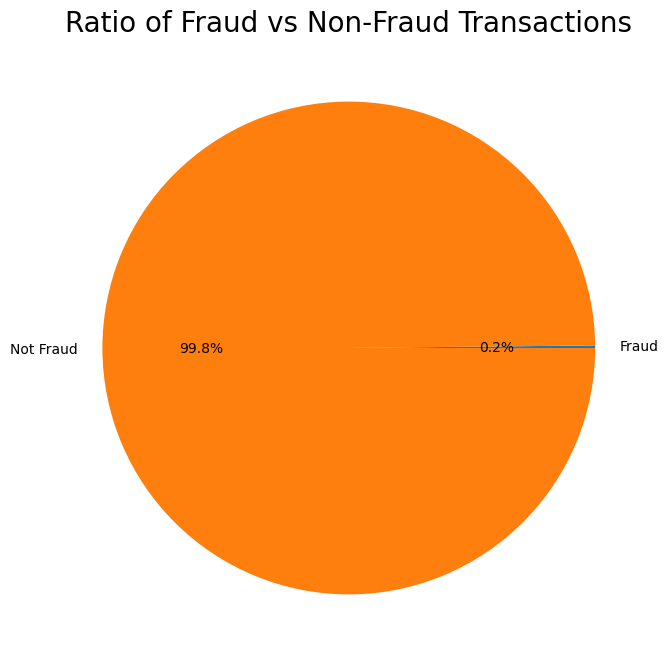

In [ ]:
# counting the length/number of fraud and non-fraud transactions
fraud = len(df[df['Class'] == 1])
notfraud = len(df[df['Class'] == 0])

#labels and values for the pie chart
labels = ['Fraud', 'Not Fraud']
sizes = [fraud, notfraud]
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
plt.title('Ratio of Fraud vs Non-Fraud Transactions', fontsize=20)
plt.show()


#Feature Engineering

In [ ]:
# 3600 converts seconds to hours, % 24 keeps time within a 24-hour day
df['Hour'] = (df['Time'] / 3600) % 24

# Setting night transactions 21 PM - 6 AM to 1, all others to 0
df['Is_Night'] = np.where((df['Hour'] >= 21) | (df['Hour'] <= 6), 1, 0)




In [ ]:
# Drop original 'Time' column to avoid repeating them
X = df.drop(columns=['Class', 'Time'])

# Target variable
y = df['Class']

In [ ]:
#80% training data 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
# training data will normalize the Amount and Is_Night columns
X_train[['Amount', 'Is_Night']] = scaler.fit_transform(X_train[['Amount', 'Is_Night']])
# same scaling parameters to the test data both need to be scaled to the same metric for the model to understand it
X_test[['Amount', 'Is_Night']] = scaler.transform(X_test[['Amount', 'Is_Night']])

In [ ]:
print(X_train.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Hour',
       'Is_Night'],
      dtype='object')


In [ ]:
X.shape

(283726, 31)

In [ ]:
y.shape

(283726,)

#Random Forest on Imbalanced Dataset

In [ ]:
#Random Forest classifier with 50 trees and fixed randomness no weights on the features; random sate so i get the same results each time
rf_model_imbalanced_data = RandomForestClassifier(n_estimators=50, random_state=21, class_weight=None)

# Train the model on the imbalanced training dataset
rf_model_imbalanced_data.fit(X_train, y_train)

# Predict on the test set
y_pred_Labels_RF_imbalanced_data = rf_model_imbalanced_data.predict(X_test)

#classification report
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_Labels_RF_imbalanced_data))

Random Forest Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.70      0.81        90

    accuracy                           1.00     56746
   macro avg       0.98      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746



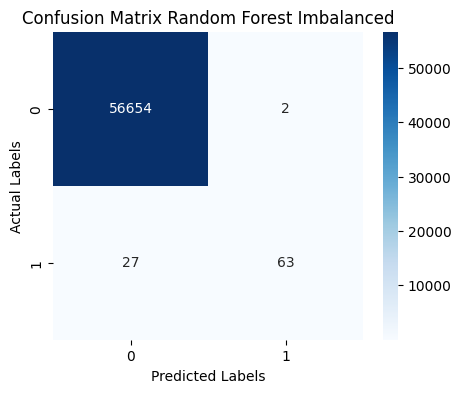

In [ ]:
# a confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_Labels_RF_imbalanced_data), annot=True,fmt='d', cmap='Blues')
# what the model predicted
plt.xlabel('Predicted Labels')
# the actual true labels from the dataset)
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Random Forest Imbalanced')
plt.show()

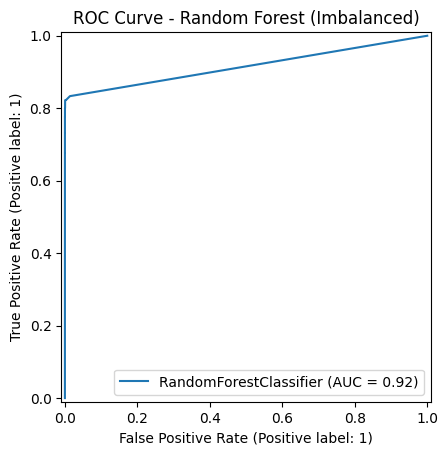

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Plots the ROC curve by using the trained model to predict on X_test and comparing results with y_test.
RocCurveDisplay.from_estimator(rf_model_imbalanced_data, X_test, y_test)
plt.title("ROC Curve - Random Forest (Imbalanced)")
plt.show()
#Positivee label : 1 is fraud label

#XGboost on Imbalanced Dataset

In [ ]:
#auc metric for better evaluation in imbalanced datasets
xgb_model_imbalanced_data = XGBClassifier(eval_metric='auc', random_state=21)

# Training the model on the imbalanced dataset
xgb_model_imbalanced_data.fit(X_train, y_train)

# Predicting labels on the test set
y_pred_Lables_XGBoost_imbalanced_data = xgb_model_imbalanced_data.predict(X_test)

#classification report
print("XGBoost Model Performance:")
print(classification_report(y_test, y_pred_Lables_XGBoost_imbalanced_data))

XGBoost Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.73      0.83        90

    accuracy                           1.00     56746
   macro avg       0.98      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746



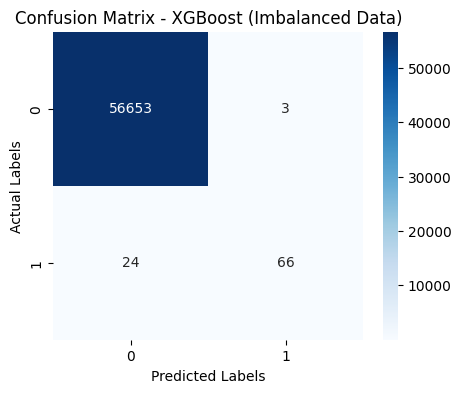

In [ ]:
# confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_Lables_XGBoost_imbalanced_data), annot=True,fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - XGBoost (Imbalanced Data)')
plt.show()



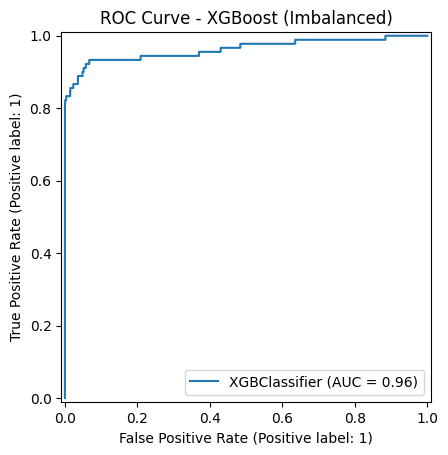

In [ ]:
# ROC Curve
# Plots the ROC curve by using the trained model to predict on X_test and comparing results with y_test.
RocCurveDisplay.from_estimator(xgb_model_imbalanced_data, X_test, y_test)
plt.title("ROC Curve - XGBoost (Imbalanced)")
plt.show()


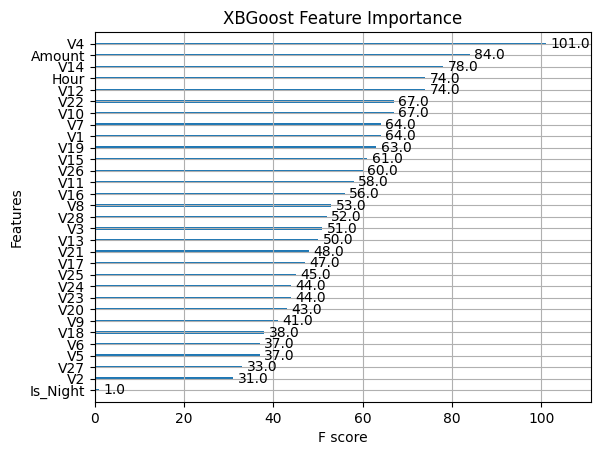

In [ ]:
# Plotting which feature was used more often
xgb.plot_importance(xgb_model_imbalanced_data, importance_type='weight')
plt.title('XBGoost Feature Importance')
plt.show()


#Artifical Neural Network on Imbalanced Dataset

In [ ]:
#The number of features/columns in the Xtrain
num_features = X_train.shape[1]

ANN_imbalanced_model = keras.Sequential([
    keras.layers.Dense(31, activation='relu', input_shape=(num_features,)),  # First Hidden Layer
    keras.layers.Dense(68, activation='relu'),  # Second Hidden Layer
    keras.layers.Dense(33, activation='relu'),  # Third Hidden Layer
    keras.layers.Dense(13, activation='relu'),  # Fourth Hidden Layer
    keras.layers.Dense(1, activation='sigmoid')  # Output Layer (Sigmoid for binary classification)
])

# Compiling the model using Adam optimizer(automatically adjusts learning rates), binary crossentropy loss function- for binary problem, and accuracy metricto see how often the model predicts correctly
ANN_imbalanced_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

#training data for 10 epochs with a batch size of 32, and validate using the test set
history_ANN_imbalanced = ANN_imbalanced_model.fit(X_train,
  y_train,
  epochs=15,
  batch_size=28,
  validation_data=(X_test, y_test))

# Predictions on test dataset if the predicted value is greater than 0.5, label it as 1 (fraud), else 0 (not fraud)
y_pred_Labels_ANN_imbalanced_data = (ANN_imbalanced_model.predict(X_test) > 0.5).astype("int")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
8107/8107 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9978 - loss: 0.0106 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 2/15
8107/8107 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9995 - val_loss: 0.0038
Epoch 3/15
8107/8107 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 4/15
8107/8107 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9995 - val_loss: 0.0041
Epoch 5/15
8107/8107 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9994 - val_loss: 0.0035
Epoch 6/15
8107/8107 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9995 - val_loss: 0.0038
Epoch 7/15
8107/8107 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9992 - val_loss: 0.0038
Epoch 8/15
8107/8107 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9995 - loss: 0

In [ ]:
#classification report
print("Artfical Neural Network Model Performance:")
print(classification_report(y_test, y_pred_Labels_ANN_imbalanced_data))

Artfical Neural Network Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.71      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



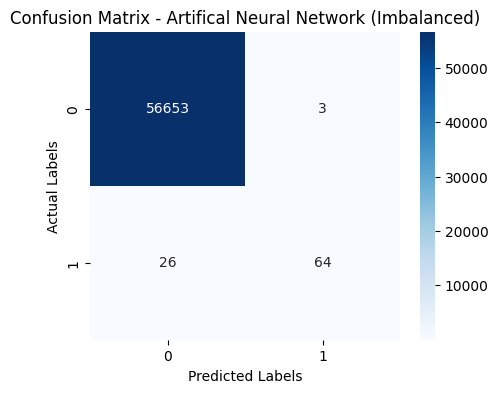

In [ ]:
#confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_Labels_ANN_imbalanced_data), annot=True,fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Artifical Neural Network (Imbalanced)')
plt.show()



1774/1774 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


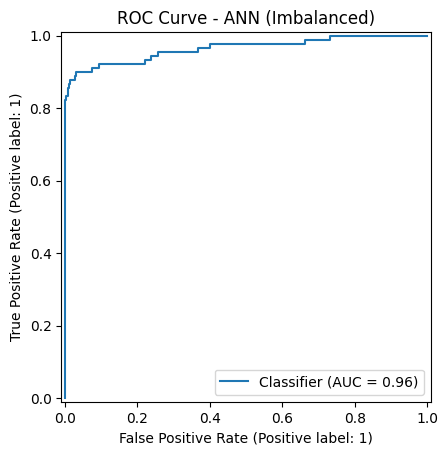

In [ ]:
# ROC Curve
#the model predicts fraud probabilities based on X_test..flatten for 1Darray
y_pred_probs_ann_imbalanced = ANN_imbalanced_model.predict(X_test).flatten()
#these predictions are compared with y_test in from_predictions().
RocCurveDisplay.from_predictions(y_test, y_pred_probs_ann_imbalanced)
plt.title("ROC Curve - ANN (Imbalanced)")
plt.show()


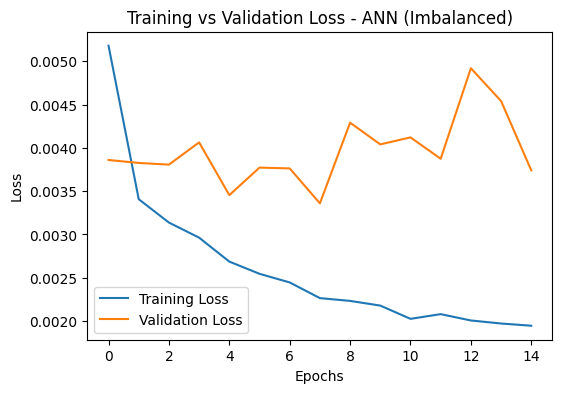

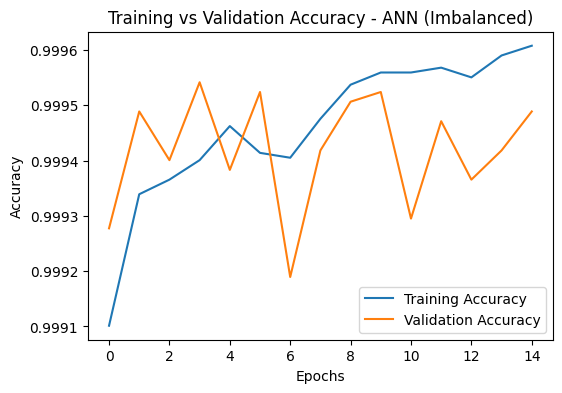

In [ ]:
# Plot Training vs Validation Loss
#history keeps track of how the model performed during training, at each epoch
plt.figure(figsize=(6, 4))
plt.plot(history_ANN_imbalanced.history['loss'], label='Training Loss') # Plots training loss over epochs
plt.plot(history_ANN_imbalanced.history['val_loss'], label='Validation Loss') # Plots validation loss over epochs
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss - ANN (Imbalanced)')
plt.legend()
plt.show()

# Plot Training vs Validation Accuracy
plt.figure(figsize=(6, 4))
plt.plot(history_ANN_imbalanced.history['accuracy'], label='Training Accuracy')# Plots training accuracy over epochs
plt.plot(history_ANN_imbalanced.history['val_accuracy'], label='Validation Accuracy')# Plots validation accuracy over epochs
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy - ANN (Imbalanced)')
plt.legend()
plt.show()


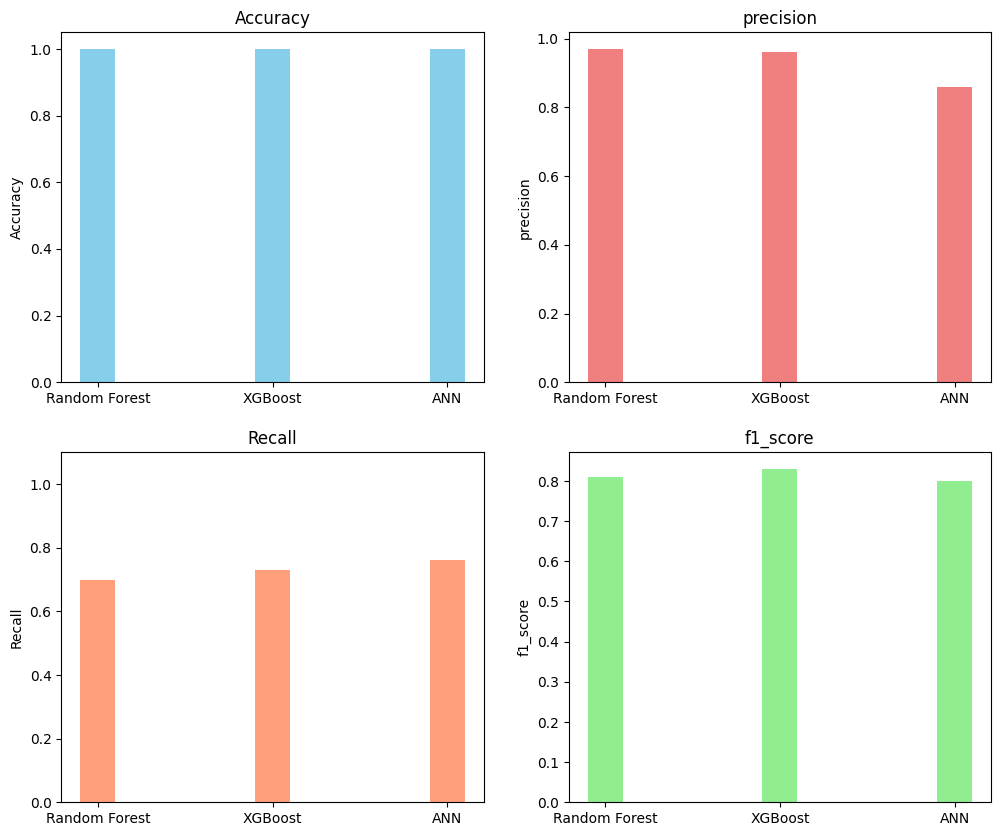

In [ ]:
# Data fron the different imabalanced models
models = ['Random Forest', 'XGBoost', 'ANN']
accuracy = [1.00, 1.00, 1.00]
precision = [0.97, 0.96, 0.86]
recall = [0.70, 0.73, 0.76]
f1_score = [0.81, 0.83, 0.80]

# 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bar width
bar_width = 0.2

# Accuracy
axes[0, 0].bar(models, accuracy, width=bar_width, color='skyblue')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylabel('Accuracy')

# Precision
axes[0, 1].bar(models, precision, width=bar_width, color='lightcoral')
axes[0, 1].set_title('precision')
axes[0, 1].set_ylabel('precision')

# Recall
axes[1, 0].bar(models, recall, width=bar_width, color='lightsalmon')
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim([0, 1.1])
axes[1, 0].set_ylabel('Recall')

#f1_score
axes[1, 1].bar(models, f1_score, width=bar_width, color='lightgreen')
axes[1, 1].set_title('f1_score')
axes[1, 1].set_ylabel('f1_score')


plt.show()


#Undersampling

In [ ]:
# Balance the dataset by making the number of fraud and non-fraud cases equal
undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=21)

# Apply undersampling to reduce the number of majority class (non-fraud) transactions
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Get the unique class labels (0 = legitimate, 1 = fraudulent) and their new label counts after undersampling
class_labels, class_counts = np.unique(y_train_undersampled, return_counts=True)

# Print the updated class distribution after balancing
# zip pairs each class label with its corresponding count.
# dict converts these pairs into a dictionary turns it into a readable dictionary
print("Class distribution after undersampling:", dict(zip(class_labels, class_counts)))



Class distribution after undersampling: {np.int64(0): np.int64(383), np.int64(1): np.int64(383)}


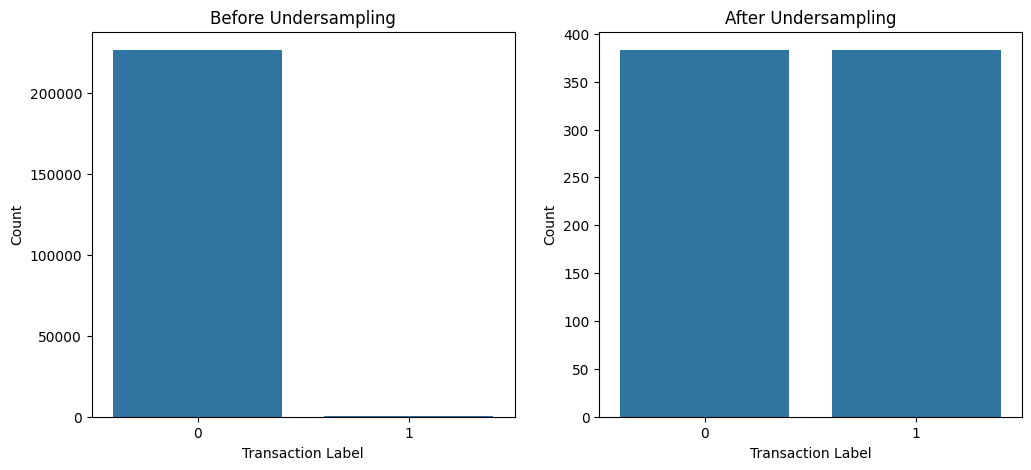

In [ ]:
# the number of uniques fraudulent and legitimate transactions BEFORE undersampling
unique_classes_before_undersampling, their_class_counts = np.unique(y_train, return_counts=True)  # np.unique() finds unique labels and their counts
# zip pairs each class label with its corresponding count.
# dict converts these pairs into a dictionary for later lookup into a readable dictionary
labels_and_transactions_counts_before_undersampling = dict(zip(unique_classes_before_undersampling, their_class_counts))

# the number of uniques fraudulent and legitimate transactions AFTER undersampling
unique_classes_after_undersampling, their_class_count = np.unique(y_train_undersampled, return_counts=True)  # np.unique() finds the unique labels and their counts but now with the balanced data
# zip pairs each class label with its corresponding count
# dict converts these pairs into a dictionary for later lookup into a readable dictionary
labels_and_transactions_counts_after_undersampling = dict(zip(unique_classes_after_undersampling, their_class_count))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot BEFORE undersampling
sns.barplot(x=list(labels_and_transactions_counts_before_undersampling.keys()),  #  Transaction labels
            y=list(labels_and_transactions_counts_before_undersampling.values()),  # Number of transactions
            ax=axes[0])  # Plot on the left side
axes[0].set_title("Before Undersampling")
axes[0].set_xlabel("Transaction Label")
axes[0].set_ylabel("Count")

# Plot AFTER undersampling
sns.barplot(x=list(labels_and_transactions_counts_after_undersampling.keys()),  #  Transaction labels
            y=list(labels_and_transactions_counts_after_undersampling.values()),  # Number of transactions
            ax=axes[1])  # Plot on the right side
axes[1].set_title("After Undersampling")
axes[1].set_xlabel("Transaction Label")
axes[1].set_ylabel("Count")

# Show the plots
plt.show()





In [ ]:
# Training the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=21, class_weight="balanced")
random_forest_model.fit(X_train_undersampled, y_train_undersampled)  # Training on the resampled (undersampled) dataset

# Make predictions on the test data
y_pred_Labels_random_forest = random_forest_model.predict(X_test)

# Getting the model performance
print("Random Forest Model(Undersampled) Performance:")
print(classification_report(y_test, y_pred_Labels_random_forest))


Random Forest Model(Undersampled) Performance:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56656
           1       0.05      0.87      0.09        90

    accuracy                           0.97     56746
   macro avg       0.52      0.92      0.54     56746
weighted avg       1.00      0.97      0.98     56746



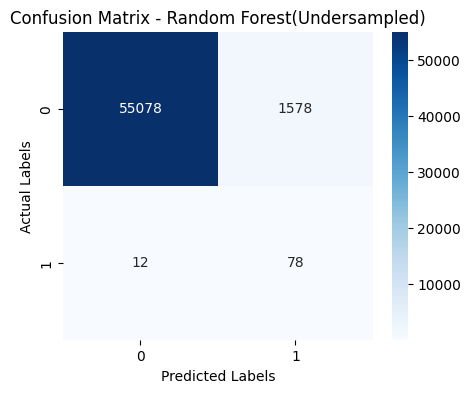

In [ ]:
# Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_Labels_random_forest), annot=True, fmt='d', cmap='Blues')
#what the model predicted
plt.xlabel('Predicted Labels')
#the true values
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest(Undersampled)')
plt.show()


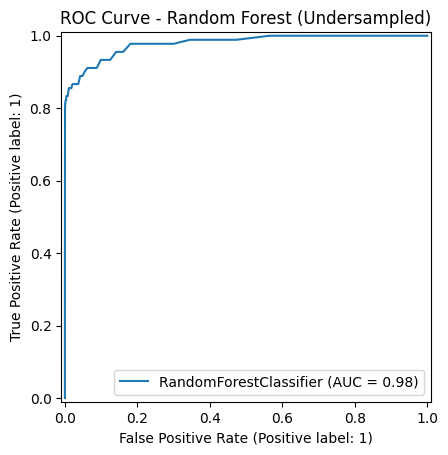

In [ ]:
# ROC Curve
# Plots the ROC curve by using the trained model to predict on X_test and comparing results with y_test.
RocCurveDisplay.from_estimator(random_forest_model, X_test, y_test)
plt.title("ROC Curve - Random Forest (Undersampled)")
plt.show()

In [ ]:
# Training the XGBoost model
xgboost_model = XGBClassifier(eval_metric='auc', random_state=42)
xgboost_model.fit(X_train_undersampled, y_train_undersampled)  # Train on the resampled (undersampled) dataset

# Make predictions on the test data
y_pred_Labels_xgboost = xgboost_model.predict(X_test)

# Getting model performance
print("XGBoost Model(Undersampled) Performance:")
print(classification_report(y_test, y_pred_Labels_xgboost))


XGBoost Model(Undersampled) Performance:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56656
           1       0.03      0.90      0.06        90

    accuracy                           0.96     56746
   macro avg       0.52      0.93      0.52     56746
weighted avg       1.00      0.96      0.98     56746



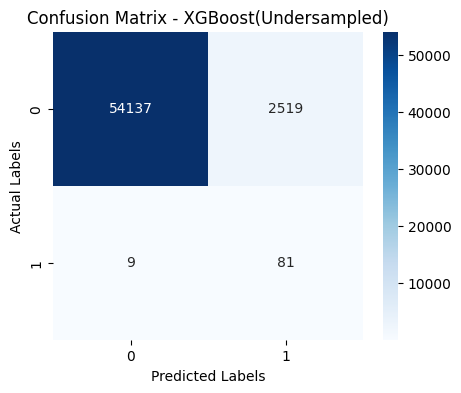

In [ ]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_Labels_xgboost), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - XGBoost(Undersampled)')
plt.show()

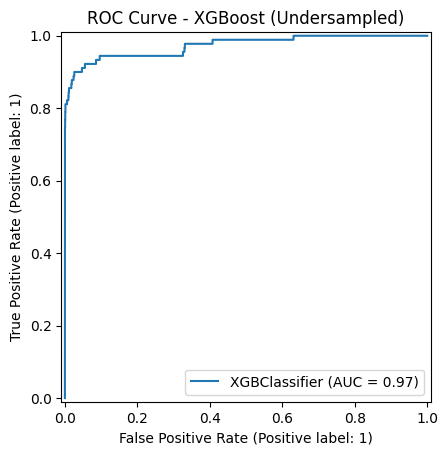

In [ ]:
# ROC Curve
# Plots the ROC curve by using the trained model to predict on X_test and comparing results with y_test.
RocCurveDisplay.from_estimator(xgboost_model, X_test, y_test)
plt.title("ROC Curve - XGBoost (Undersampled)")
plt.show()

In [ ]:
#The number of features/columns in the Xtrain
num_unersampled_features = X_train_undersampled.shape[1]

ann_undersampled_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(num_unersampled_features,)),  # First hidden layer
    keras.layers.Dense(32, activation='relu'),  # Second hidden layer
    keras.layers.Dense(16, activation='relu'),  # Third hidden layer
    keras.layers.Dense(8, activation='relu'),   # Fourth hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer (Sigmoid for binary classification)
])

# Compiling the model using Adam optimizer(automatically adjusts learning rates), binary crossentropy loss function- for binary problem, and accuracy metricto see how often the model predicts correctly
ann_undersampled_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the undersampled dataset and use the original test set for validation to check how well it performs on new data.
history_ANN_undersampled= ann_undersampled_model.fit(X_train_undersampled, y_train_undersampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))


# Predictions on test dataset if the predicted value is greater than 0.5, label it as 1 (fraud), else 0 (not fraud)
y_pred_Labels_ann = (ann_undersampled_model.predict(X_test) > 0.5).astype("int")

print("Artificial neural network(Undersampled) Performance:")
print(classification_report(y_test, y_pred_Labels_ann))
print("AUC Score:", roc_auc_score(y_test, y_pred_Labels_ann))



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 275ms/step - accuracy: 0.6071 - loss: 0.5509 - val_accuracy: 0.9492 - val_loss: 0.3856
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.9179 - loss: 0.2669 - val_accuracy: 0.9686 - val_loss: 0.2347
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.9318 - loss: 0.2189 - val_accuracy: 0.9523 - val_loss: 0.2248
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.9466 - loss: 0.1534 - val_accuracy: 0.9586 - val_loss: 0.1941
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - accuracy: 0.9528 - loss: 0.1608 - val_accuracy: 0.9734 - val_loss: 0.1435
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.9530 - loss: 0.1537 - val_accuracy: 0.9823 - val_loss: 0.0981
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.9608 - loss: 0.1278 - val_accuracy: 0.9802 - val_loss: 0.1032
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 226ms/step - accuracy: 0.9706 - loss: 0.0988 - val_accuracy: 0.9723 - val

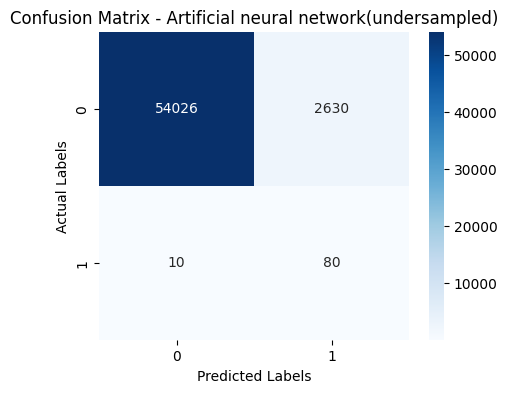

In [ ]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_Labels_ann), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Artificial neural network(undersampled)')
plt.show()


1774/1774 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


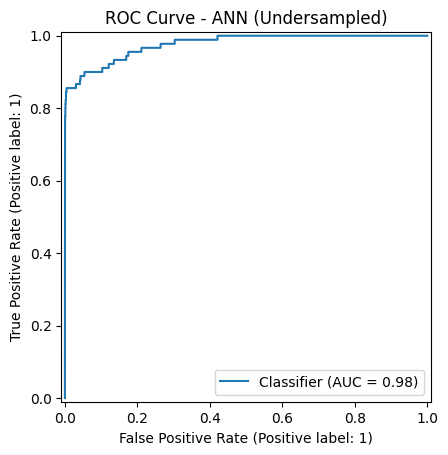

In [ ]:
# ROC Curve
##the model predicts fraud probabilities based on X_test..flatten for 1Darray
y_pred_probs_ann_undersampled = ann_undersampled_model.predict(X_test).flatten()
#these predictions/results are compared with y_test in from_predictions().
RocCurveDisplay.from_predictions(y_test, y_pred_probs_ann_undersampled)
plt.title("ROC Curve - ANN (Undersampled)")
plt.show()


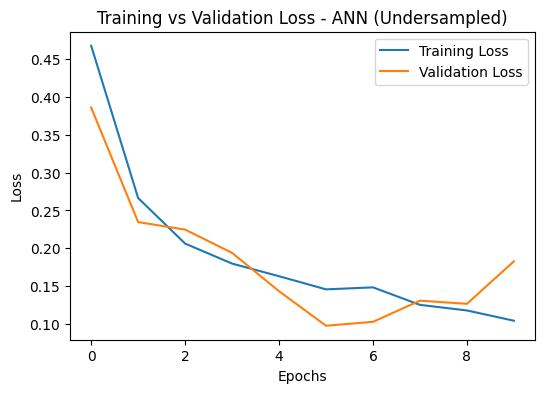

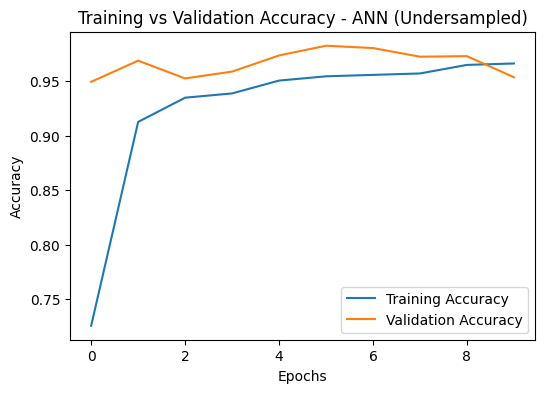

In [ ]:
# Plot Training vs Validation Loss
#history keeps track of how the model performed during training, at each epoch.
plt.figure(figsize=(6, 4))
plt.plot(history_ANN_undersampled.history['loss'], label='Training Loss')# Plotting training loss over epochs
plt.plot(history_ANN_undersampled.history['val_loss'], label='Validation Loss')# Plotting validation loss over epochs
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss - ANN (Undersampled)')
plt.legend()
plt.show()

# Plot Training vs Validation Accuracy
plt.figure(figsize=(6, 4))
plt.plot(history_ANN_undersampled.history['accuracy'], label='Training Accuracy') # Plotting training accuracy over epochs
plt.plot(history_ANN_undersampled.history['val_accuracy'], label='Validation Accuracy') # Plotting validation accuracy over epochs
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy - ANN (Undersampled)')
plt.legend()
plt.show()


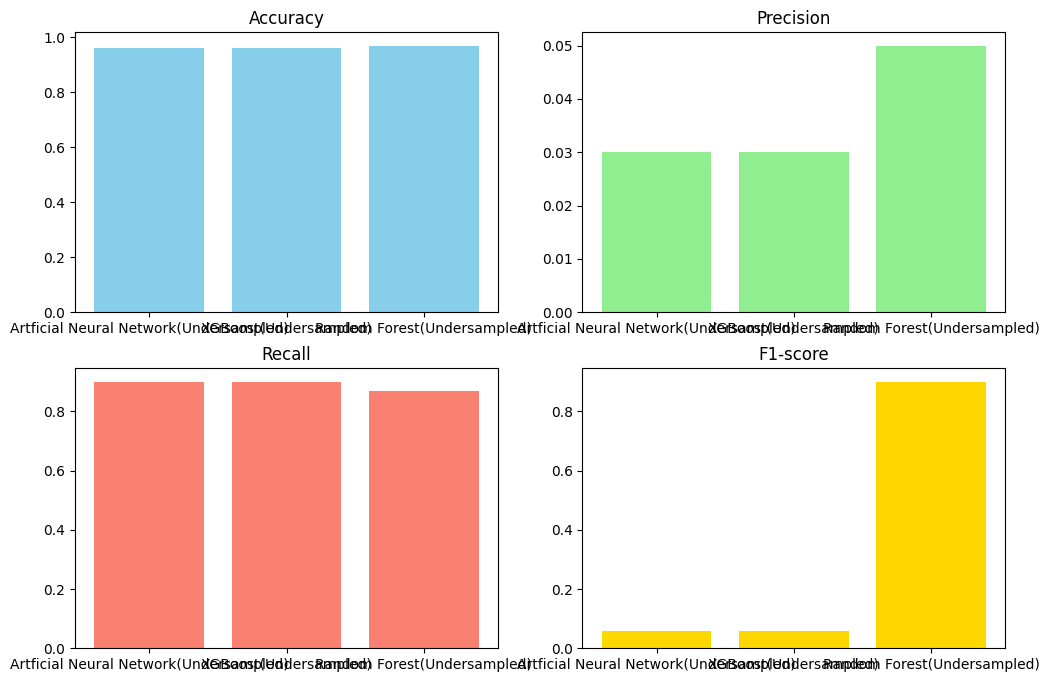

In [ ]:

models = ['Artficial Neural Network(Undersampled)', 'XGBoost(Undersampled)', 'Random Forest(Undersampled)']

accuracy = [0.96, 0.96, 0.97]
precision = [0.03, 0.03, 0.05]
recall = [0.90, 0.90, 0.87]
f1_score = [0.06, 0.06, 0.9]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#  accuracy
axes[0, 0].bar(models, accuracy, color='skyblue')
axes[0, 0].set_title('Accuracy')


# precision
axes[0, 1].bar(models, precision, color='lightgreen')
axes[0, 1].set_title('Precision')


# recall
axes[1, 0].bar(models, recall, color='salmon')
axes[1, 0].set_title('Recall')


#  F1-score
axes[1, 1].bar(models, f1_score, color='gold')
axes[1, 1].set_title('F1-score')


plt.show()



#Oversampled


In [ ]:
# Initialize SMOTE to balance the dataset 1: 1 by generating synthetic samples for the minority class
smote = SMOTE(sampling_strategy=1.0, random_state=21)

# Applying SMOTE to the training data to create a balanced dataset.
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Count how many unique labels and their counts are there after SMOTE
unique, counts = np.unique(y_train_smote, return_counts=True)

# zip pairs each class label with its corresponding count.
# dict converts these pairs into a dictionary turns it into a readable dictionary
print("Class distribution after SMOTE oversampling:", dict(zip(unique, counts)))


Class distribution after SMOTE oversampling: {np.int64(0): np.int64(226597), np.int64(1): np.int64(226597)}


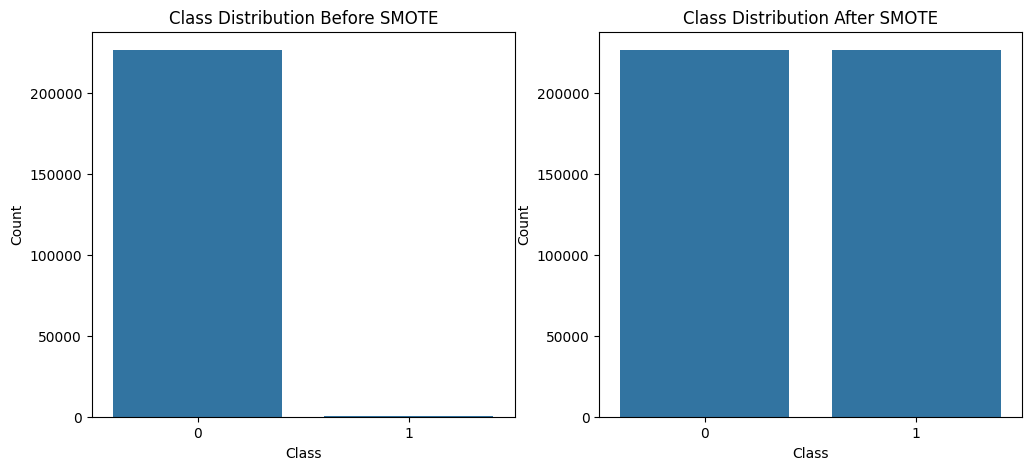

In [ ]:
unique_labels_class, their_counts = np.unique(y_train, return_counts=True)  # Find unique class labels and their counts
# zip pairs each class label with its corresponding count
# dict converts these pairs into a dictionary for later lookup and turns it into a readable dictionary
class_label_counts_before = dict(zip(unique_labels_class, their_counts))

unique_class_labels_after_smote, thier_counts_after_smote = np.unique(y_train_smote, return_counts=True)  # Find unique class labels and their new counts after SMOTE
# zip pairs each class label with its corresponding count
# dict converts these pairs into a dictionary for later lookup and turns it into a readable dictionary
class_label_counts_after = dict(zip(unique_class_labels_after_smote, thier_counts_after_smote))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=list(class_label_counts_before.keys()),  # Class labels
            y=list(class_label_counts_before.values()),  # Number of transactions in each class
            ax=axes[0])  # Plot on the left side.
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

sns.barplot(x=list(class_label_counts_after.keys()),  #  Class labels after SMOTE
            y=list(class_label_counts_after.values()),  # Number of transactions in each class
            ax=axes[1])  # Plot on the right side.
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.show()


In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=21, class_weight="balanced")
rf_model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred_Labels_rf_smote = rf_model.predict(X_test)

# Getting model performance
print("Random Forest Model(Oversampled) Performance:")
print(classification_report(y_test, y_pred_Labels_rf_smote))

Random Forest Model(Oversampled) Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.93      0.78      0.85        90

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746



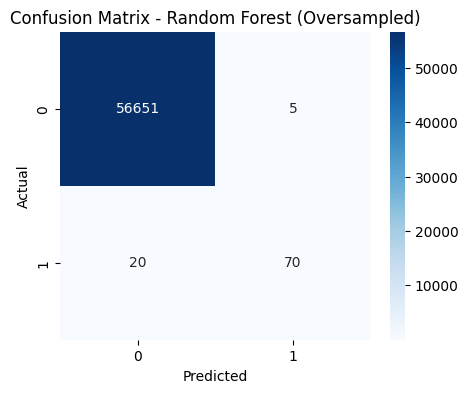

In [ ]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_Labels_rf_smote), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Oversampled)')
plt.show()



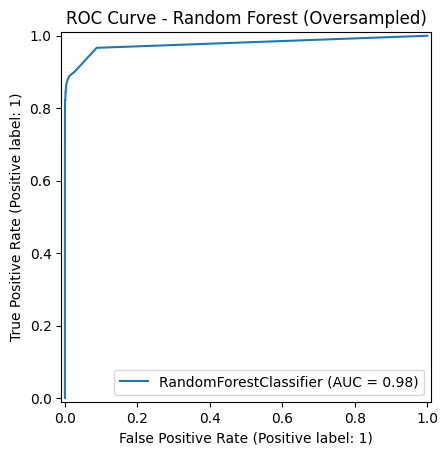

In [ ]:
# ROC Curve
# Plots the ROC curve by using the trained model to predict on X_test and comparing results with y_test.
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve - Random Forest (Oversampled)")
plt.show()

In [ ]:
xgb_model = XGBClassifier(eval_metric='auc', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred_xgb_Labels_smote = xgb_model.predict(X_test)

# Getting model performance
print("XGBoost Performance(Oversampled):")
print(classification_report(y_test, y_pred_xgb_Labels_smote))

XGBoost Performance(Oversampled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.82      0.79      0.80        90

    accuracy                           1.00     56746
   macro avg       0.91      0.89      0.90     56746
weighted avg       1.00      1.00      1.00     56746



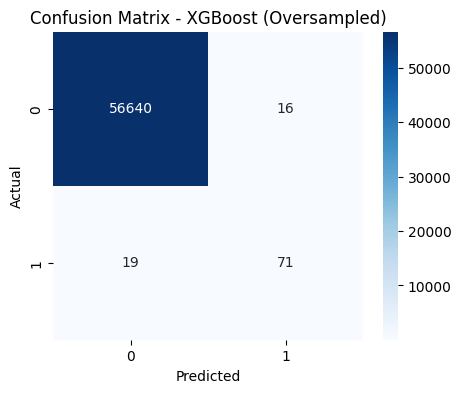

In [ ]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_Labels_smote), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost (Oversampled)')
plt.show()


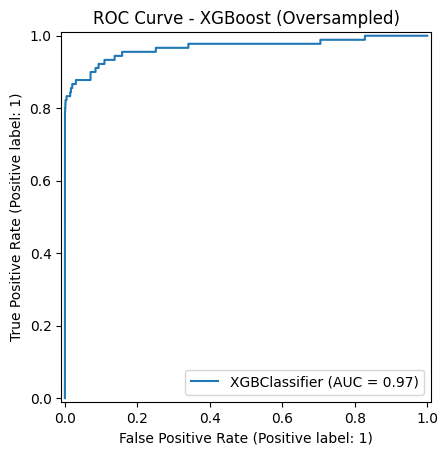

In [ ]:
# ROC Curve
# Plots the ROC curve by using the trained model to predict on X_test and comparing results with y_test.
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("ROC Curve - XGBoost (Oversampled)")
plt.show()

In [ ]:
#The number of features/columns in the Xtrain
num_oversampled_features = X_train.shape[1]

# Build ANN Model with additional hidden layers
ann_oversampled_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(num_oversampled_features,)),  # First hidden layer
    keras.layers.Dense(32, activation='relu'),  # Second hidden layer
    keras.layers.Dense(16, activation='relu'),  # Third hidden layer
    keras.layers.Dense(8, activation='relu'),   # Fourth hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compiling the model using Adam optimizer(automatically adjusts learning rates), binary crossentropy loss function- for binary problem, and accuracy metricto see how often the model predicts correctly
ann_oversampled_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on SMOTE data
history_ANN_oversampled = ann_oversampled_model.fit(X_train_smote, y_train_smote, epochs=15, batch_size=36, validation_data=(X_test, y_test))

# Predictions on test dataset if the predicted value is greater than 0.5, label it as 1 (fraud), else 0 (not fraud)
y_pred_Labels_ann_smote = (ann_oversampled_model.predict(X_test) > 0.5).astype("int")  # Convert probabilities to binary (0 or 1)

# Getting model performance
print("Artificial neural network Performance(Oversampled):")
print(classification_report(y_test, y_pred_Labels_ann_smote))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
12589/12589 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9798 - loss: 0.0543 - val_accuracy: 0.9953 - val_loss: 0.0175
Epoch 2/15
12589/12589 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9981 - loss: 0.0074 - val_accuracy: 0.9972 - val_loss: 0.0132
Epoch 3/15
12589/12589 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9988 - loss: 0.0051 - val_accuracy: 0.9988 - val_loss: 0.0089
Epoch 4/15
12589/12589 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.9987 - val_loss: 0.0095
Epoch 5/15
12589/12589 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9988 - val_loss: 0.0101
Epoch 6/15
12589/12589 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9990 - val_loss: 0.0098
Epoch 7/15
12589/12589 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9986 - val_loss: 0.0102
Epoch 8/15
12589/12589 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 

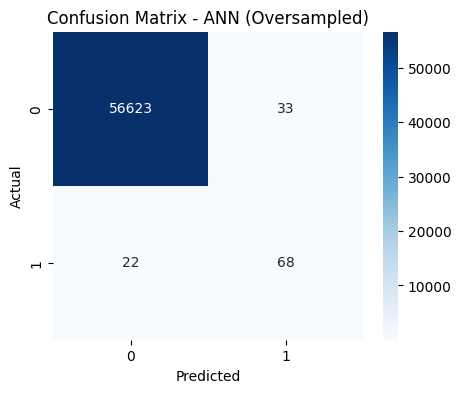

In [ ]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_Labels_ann_smote), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN (Oversampled)')
plt.show()



1774/1774 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


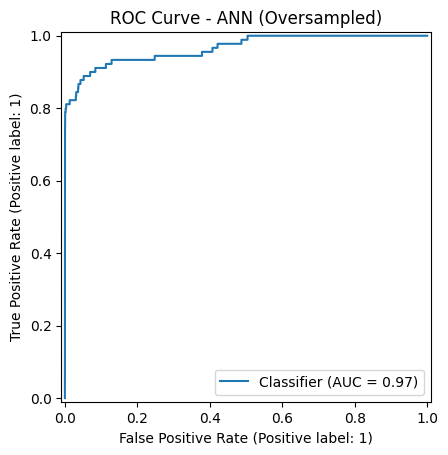

In [ ]:
# ROC Curve (ANN uses probabilities directly)
##the model predicts fraud probabilities based on X_test.flatten for 1Darray
y_pred_probs_ann_oversampled = ann_oversampled_model.predict(X_test).flatten()
#these predictions/results are compared with y_test in from_predictions().
RocCurveDisplay.from_predictions(y_test, y_pred_probs_ann_oversampled)
plt.title("ROC Curve - ANN (Oversampled)")
plt.show()

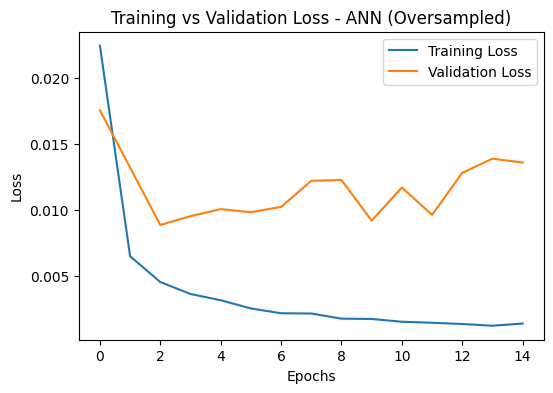

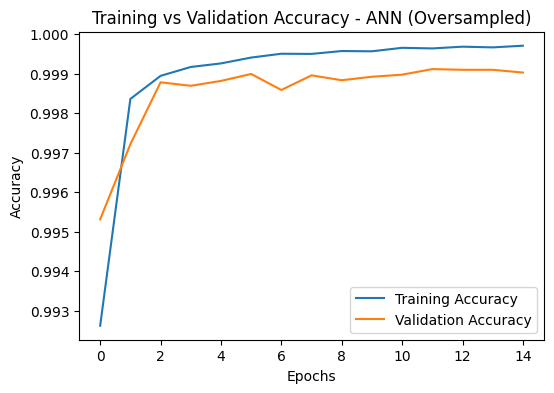

In [ ]:

# Plot Training vs Validation Loss
#history keeps track of how the model performed during training, at each epoch.
plt.figure(figsize=(6, 4))
plt.plot(history_ANN_oversampled.history['loss'], label='Training Loss') # Plots training loss over epochs
plt.plot(history_ANN_oversampled.history['val_loss'], label='Validation Loss')# Plots validation loss over epochs
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss - ANN (Oversampled)')
plt.legend()
plt.show()

# Plot Training vs Validation Accuracy
plt.figure(figsize=(6, 4))
plt.plot(history_ANN_oversampled.history['accuracy'], label='Training Accuracy')# Plots training accuracy over epochs
plt.plot(history_ANN_oversampled.history['val_accuracy'], label='Validation Accuracy')# Plots validation accuracy over epochs
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy - ANN (Oversampled)')
plt.legend()
plt.show()

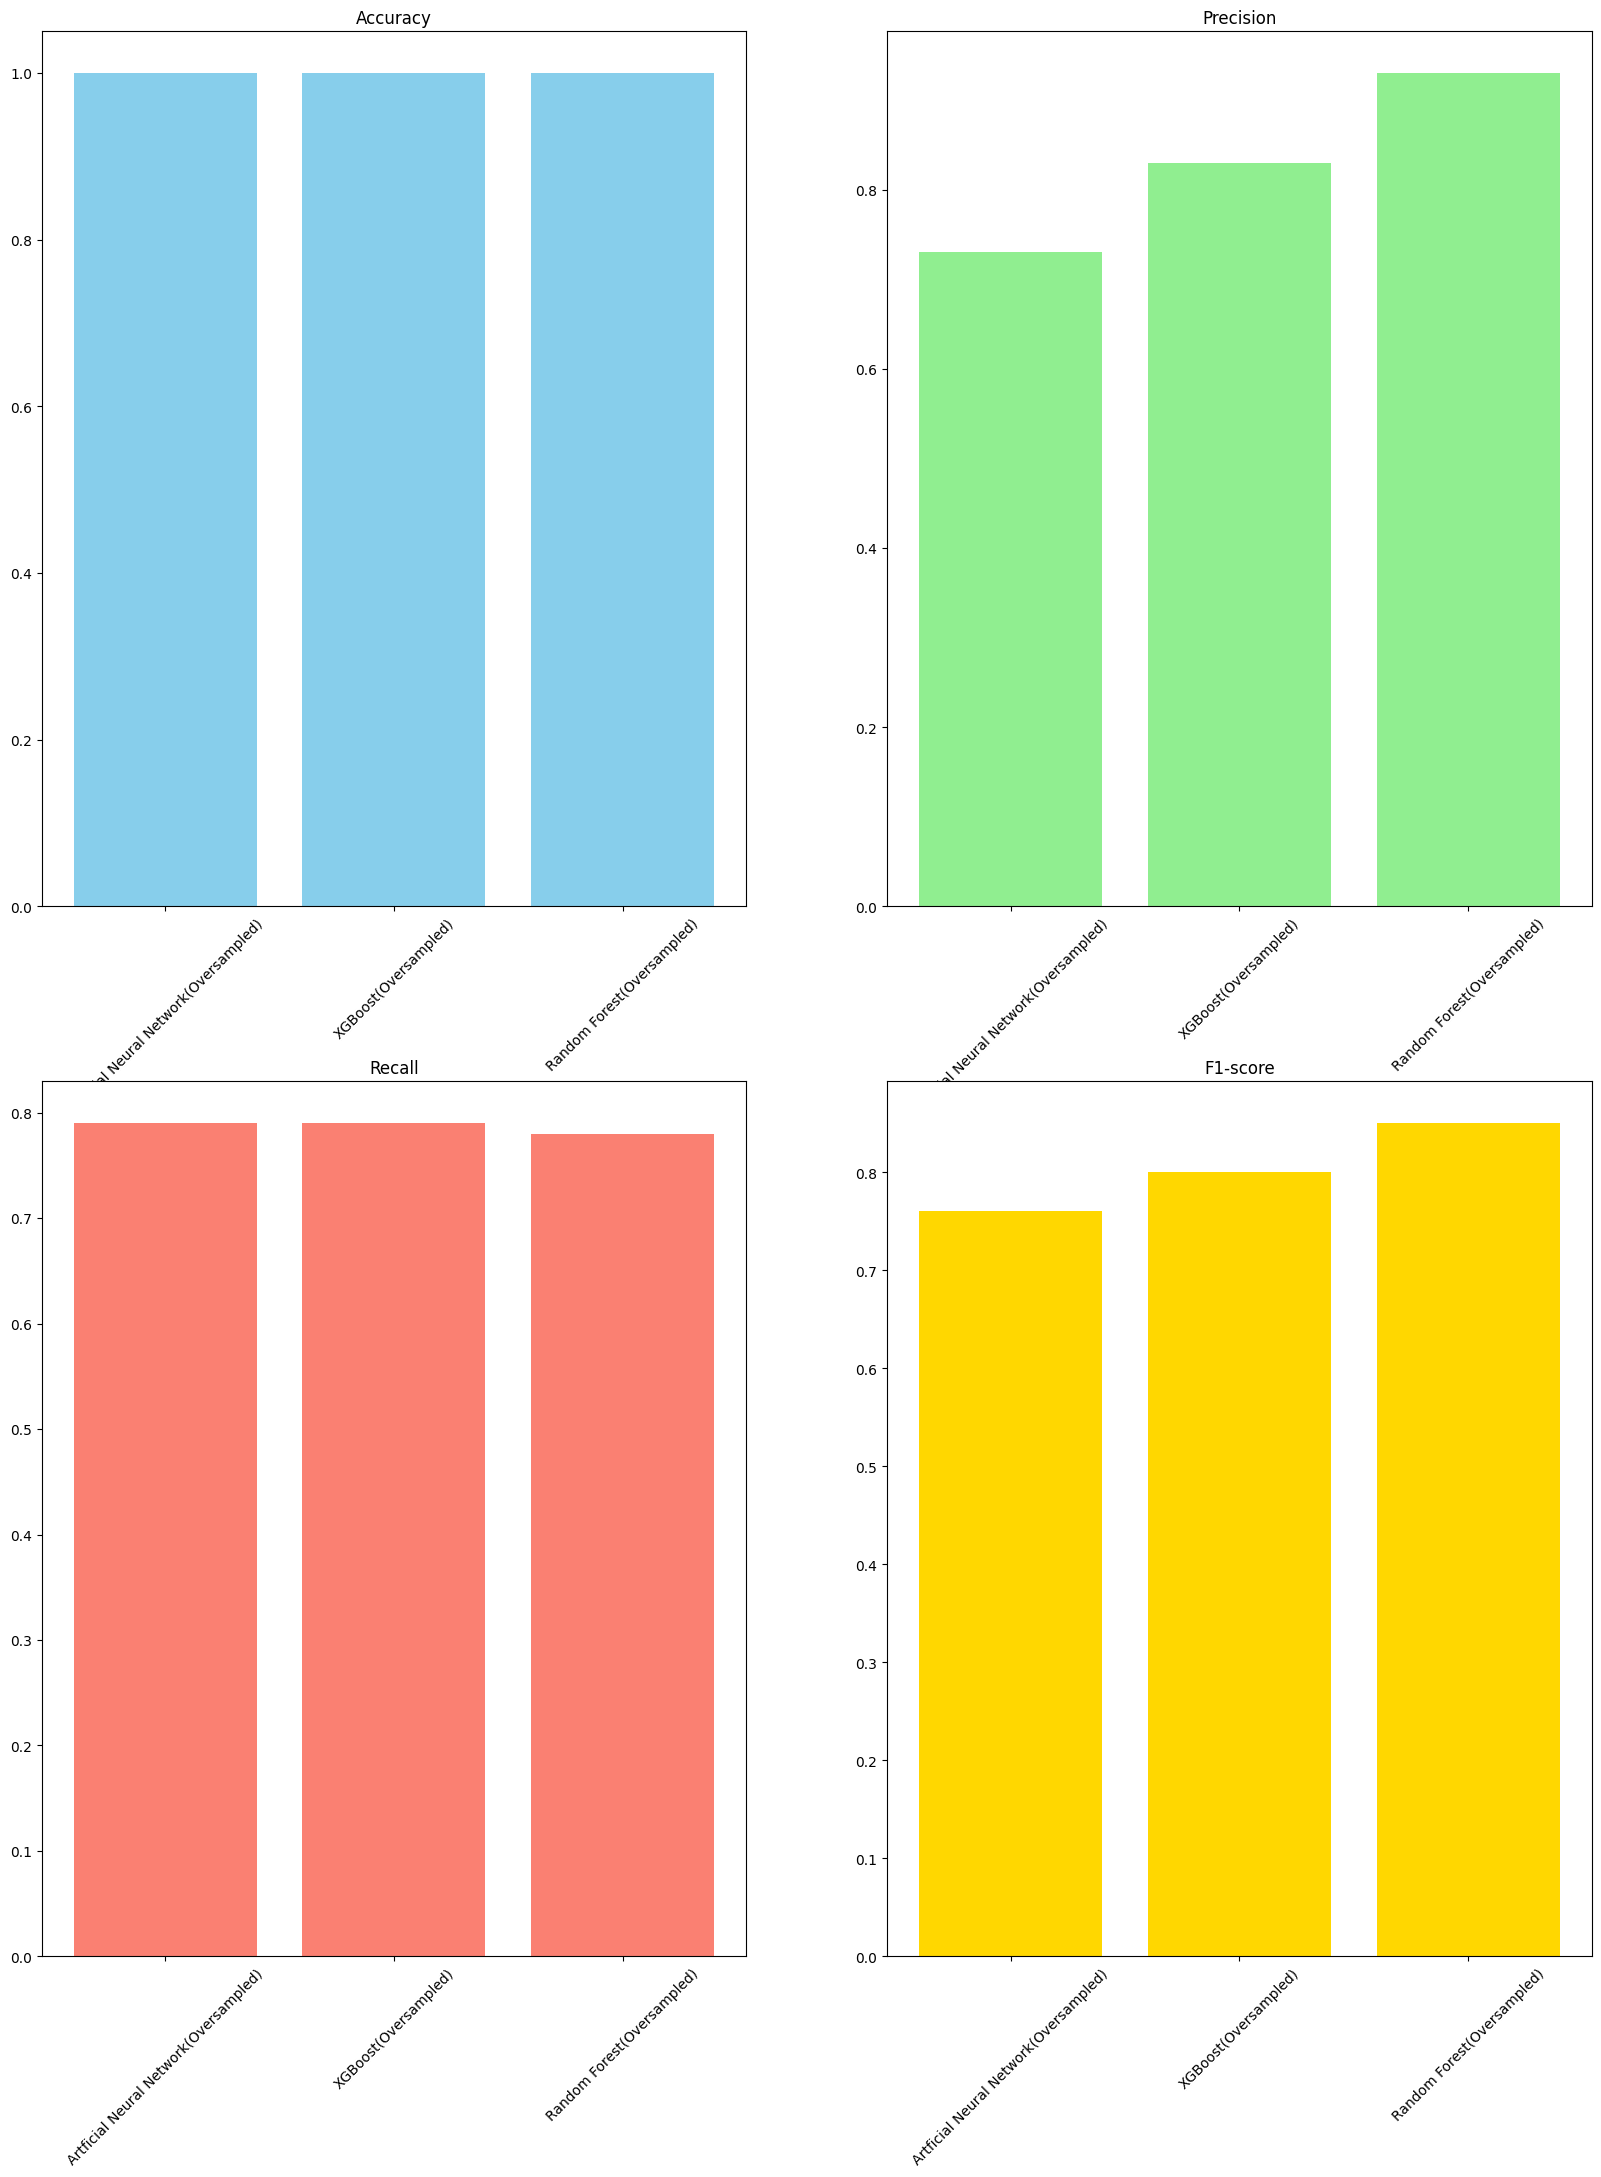

In [ ]:
models = ['Artficial Neural Network(Oversampled)', 'XGBoost(Oversampled)', 'Random Forest(Oversampled)']

accuracy = [1.00, 1.00, 1.00]
precision = [0.73, 0.83, 0.93]
recall = [0.79, 0.79, 0.78]
f1_score = [0.76, 0.80, 0.85]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 25))

# Accuracy
axes[0, 0].bar(models, accuracy, color='skyblue')
axes[0, 0].set_title('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)  # set rotation to this subplot

# Precision
axes[0, 1].bar(models, precision, color='lightgreen')
axes[0, 1].set_title('Precision')
axes[0, 1].tick_params(axis='x', rotation=45)  # set rotation to this subplot

# Recall
axes[1, 0].bar(models, recall, color='salmon')
axes[1, 0].set_title('Recall')
axes[1, 0].tick_params(axis='x', rotation=45)  # set rotation to this subplot

# F1-score
axes[1, 1].bar(models, f1_score, color='gold')
axes[1, 1].set_title('F1-score')
axes[1, 1].tick_params(axis='x', rotation=45)  # set rotation to this subplot

plt.show()



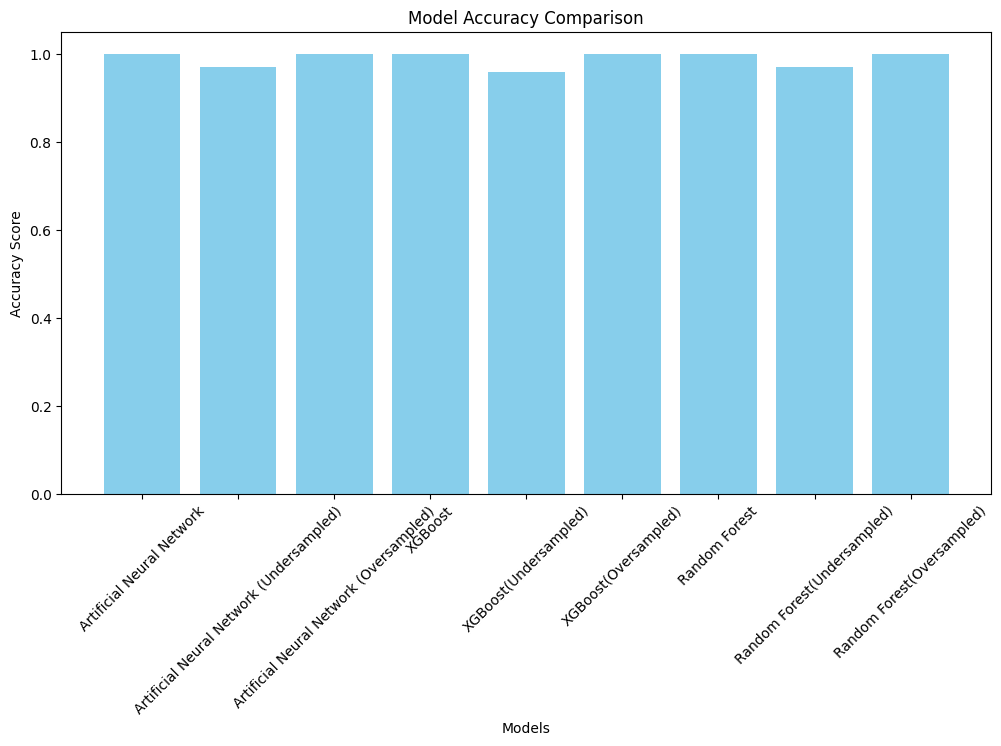

In [ ]:
import matplotlib.pyplot as plt

# List of models
models = [
    'Artificial Neural Network', 'Artificial Neural Network (Undersampled)',
    'Artificial Neural Network (Oversampled)', 'XGBoost', 'XGBoost(Undersampled)', 'XGBoost(Oversampled)', 'Random Forest', 'Random Forest(Undersampled)', 'Random Forest(Oversampled)'
]

# Accuracy scores for each model
accuracy = [1.00, 0.97, 1.00, 1.00, 0.96, 1.00, 1.00, 0.97, 1.00]

#bar plot to plot accuracy
plt.figure(figsize=(12, 6))
plt.bar(models, accuracy, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)  # Rotating labels
plt.show()


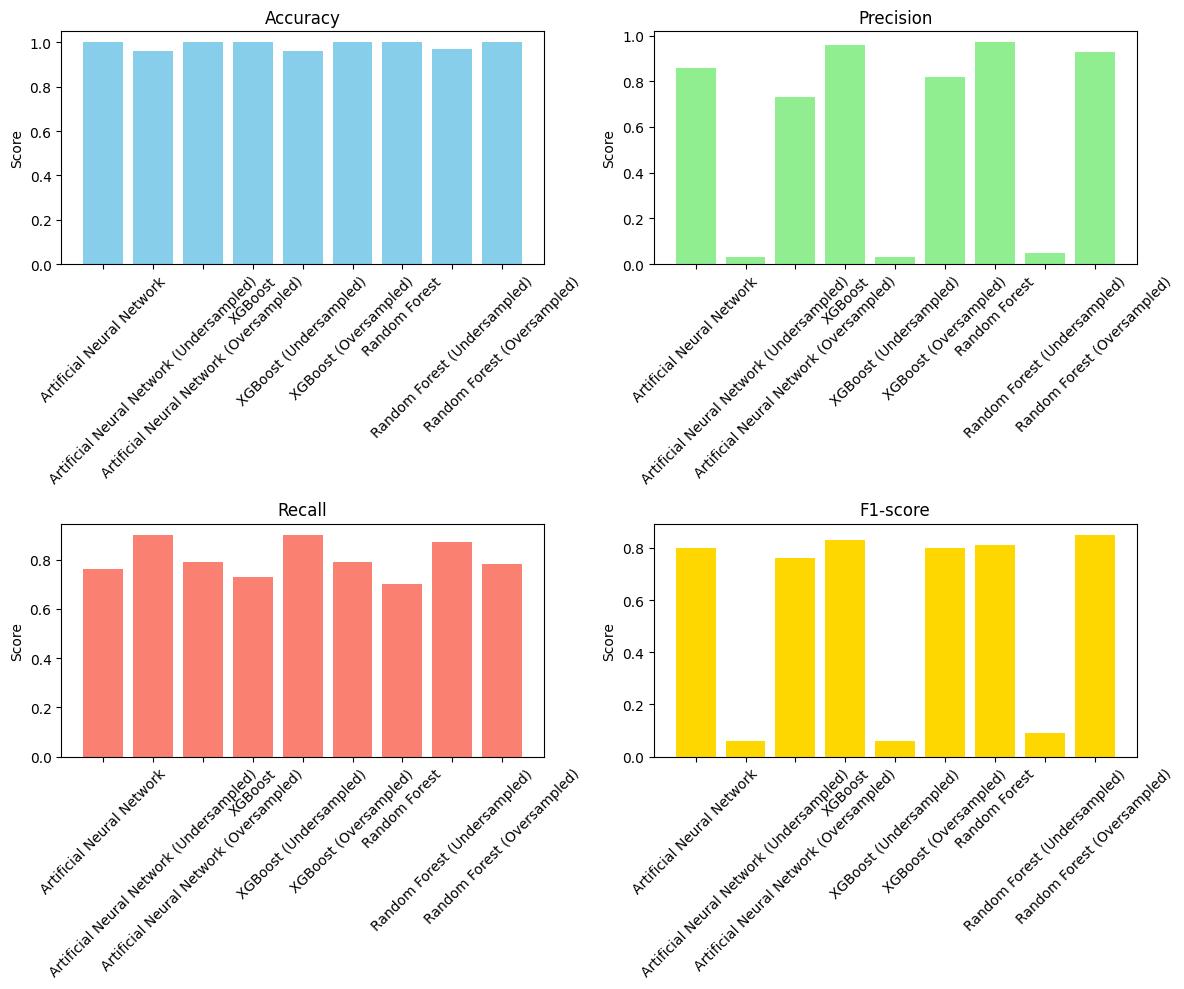

In [ ]:
import matplotlib.pyplot as plt

# List of models
models = [
    'Artificial Neural Network', 'Artificial Neural Network (Undersampled)',
    'Artificial Neural Network (Oversampled)', 'XGBoost', 'XGBoost (Undersampled)',
    'XGBoost (Oversampled)', 'Random Forest', 'Random Forest (Undersampled)', 'Random Forest (Oversampled)'
]

# Performance metrics for each model
accuracy = [1.00, 0.96, 1.00, 1.00, 0.96, 1.00, 1.00, 0.97, 1.00]
precision = [0.86, 0.03, 0.73, 0.96, 0.03, 0.82, 0.97, 0.05, 0.93]
recall = [0.76, 0.90, 0.79, 0.73, 0.90, 0.79, 0.70, 0.87, 0.78]
f1_score = [0.80, 0.06, 0.76, 0.83, 0.06, 0.80, 0.81, 0.09, 0.85]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Accuracy
axes[0, 0].bar(models, accuracy, color='skyblue')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylabel('Score')
axes[0, 0].tick_params(axis='x', rotation=45)

# Precision
axes[0, 1].bar(models, precision, color='lightgreen')
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylabel('Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# Recall
axes[1, 0].bar(models, recall, color='salmon')
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylabel('Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# F1 Score
axes[1, 1].bar(models, f1_score, color='gold')
axes[1, 1].set_title('F1-score')
axes[1, 1].set_ylabel('Score')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
